In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df = pd.read_csv("walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [8]:
df['Store'].nunique()

45

In [9]:
df.loc[df["Weekly_Sales"]<=0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [12]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [13]:
print(df['Date'].min(),df["Date"].max()) #2 year

2010-02-05 00:00:00 2012-10-26 00:00:00


In [14]:
def season_convertion(quarter):
    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'
df['year'] = df['Date'].dt.year
df['quarter'] = df['Date'].dt.quarter
df['season'] = df['quarter'].apply(season_convertion)
df['month'] = df['Date'].dt.month
df['month_name'] = df['Date'].dt.month_name()
df['week'] = df['Date'].dt.isocalendar().week
df['day_of_week'] = df['Date'].dt.day_name()

In [15]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,Winter,3,March,9,Friday


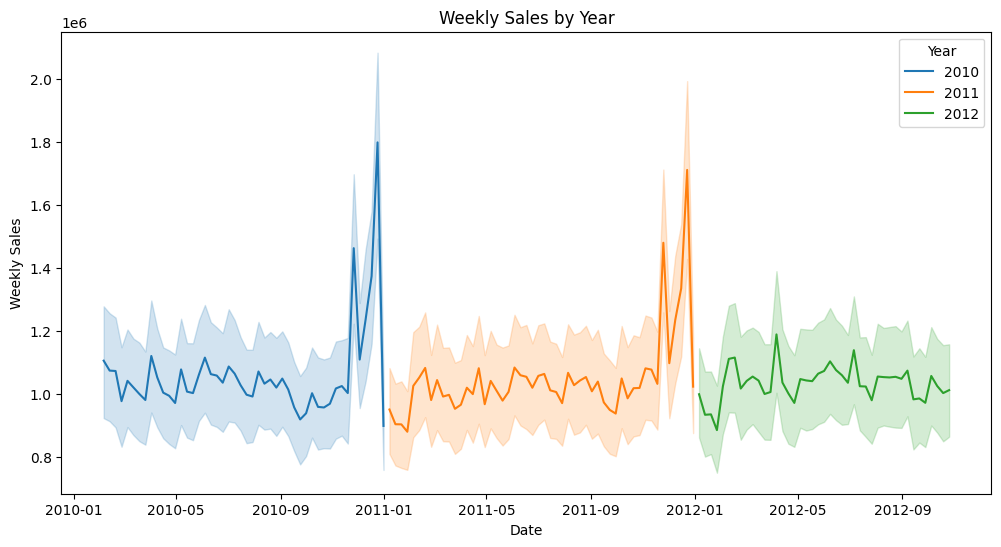

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df['Date'], y='Weekly_Sales', hue='year', palette='tab10')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Year')
plt.legend(title='Year')
plt.show()

From this plot, we can distinguish the seasonality that happened at the end of the year. For 2012 we cannot gain the same insight dut to the last date of this dataset, which is 2012-10-26. 2010 and 2011 follow the same trend. However, 2010 beginning with higher sales than the beggining of 2011. On the other hand, sales in 2011 has more variability than sales in 2010. 2012 has the lowest variability among these three years.

### New year effect

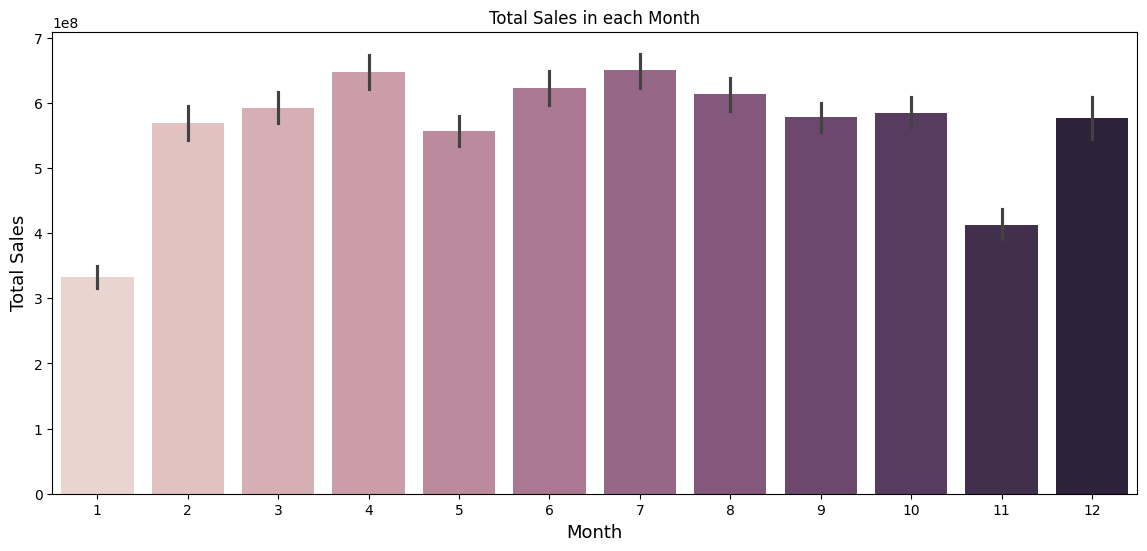

In [32]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df,
            x = 'month',
            y = 'Weekly_Sales',
            estimator = np.sum,
            hue='month',
           legend =False)

plt.title('Total Sales in each Month')
plt.xlabel('Month', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

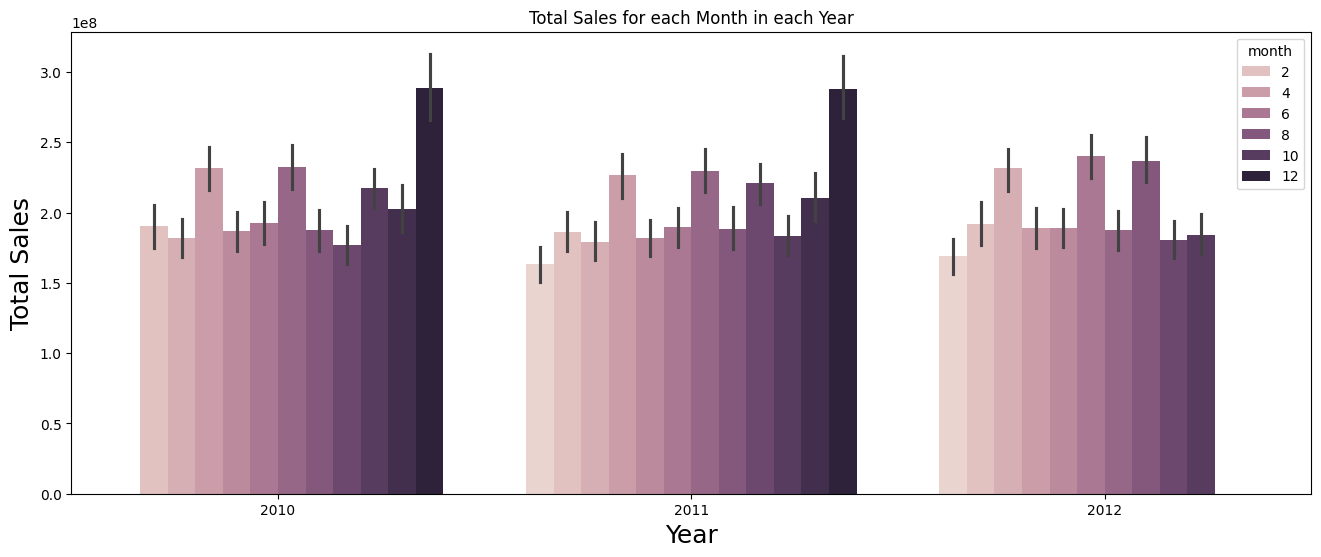

In [28]:
plt.figure(figsize = (16, 6))
sns.barplot(data =df,
            x = 'year',
            y = 'Weekly_Sales',
            hue = 'month',
            estimator = np.sum)

plt.title('Total Sales for each Month in each Year')
plt.xlabel('Year', size = 18)
plt.ylabel('Total Sales', size = 18)

plt.show()

In [44]:
K = np.round(1 + 3.322*np.log(df.shape[0])).astype("int")

In [46]:
K

30

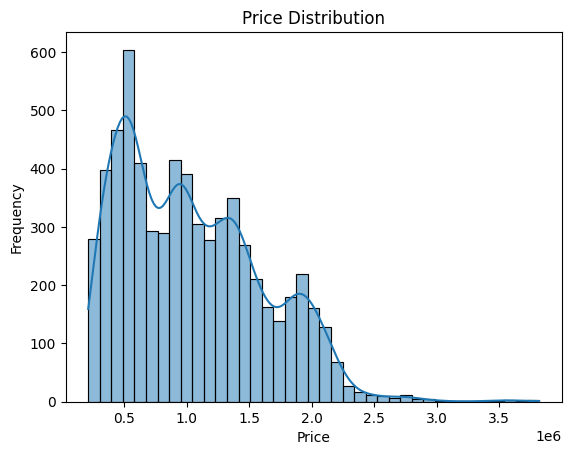

In [59]:
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

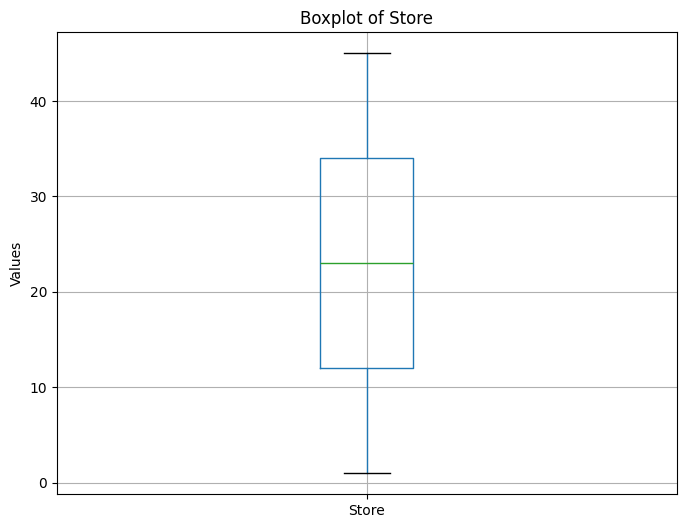

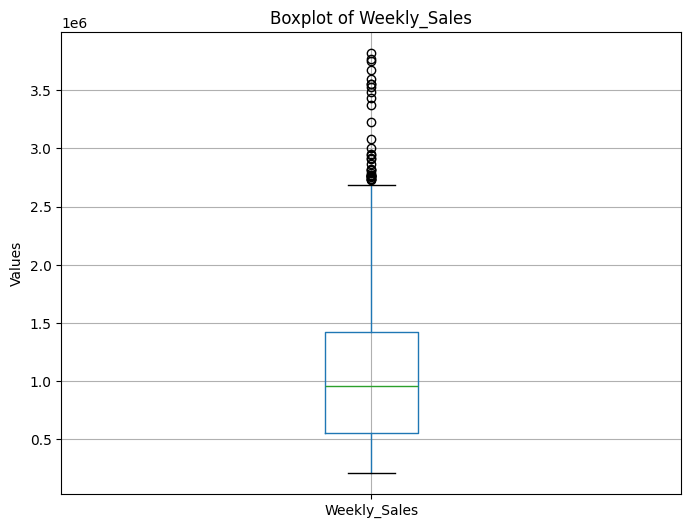

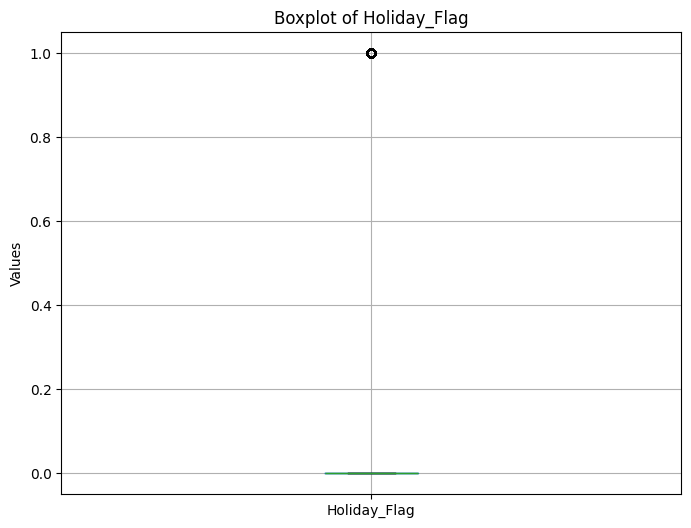

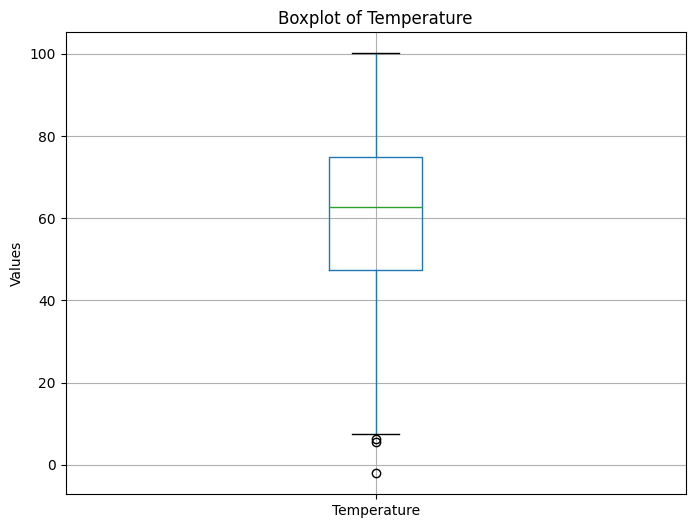

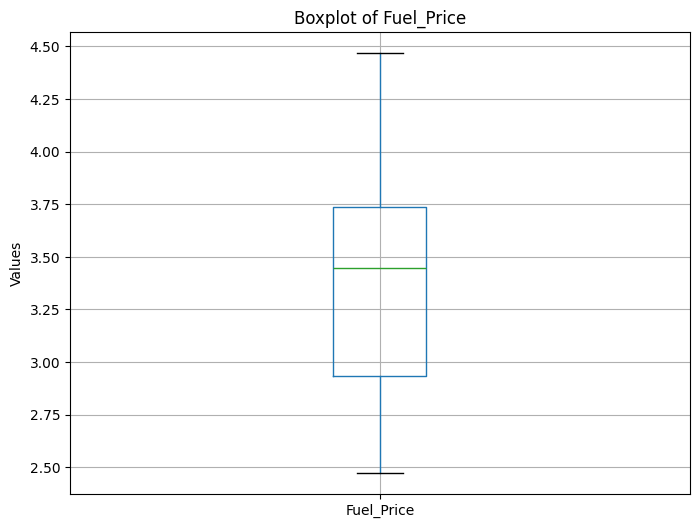

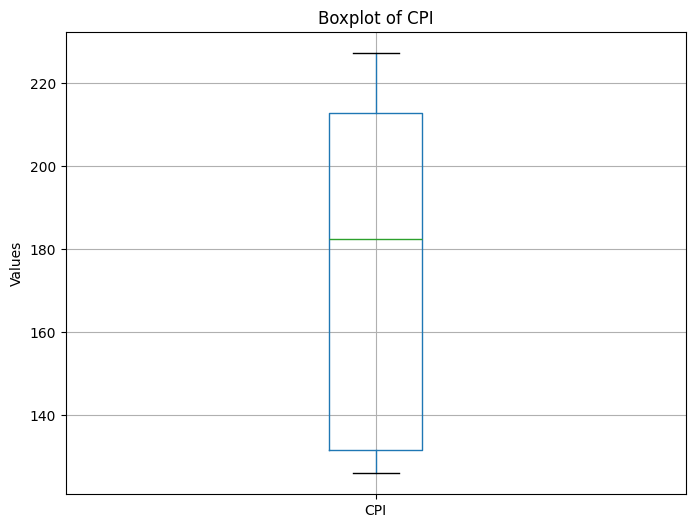

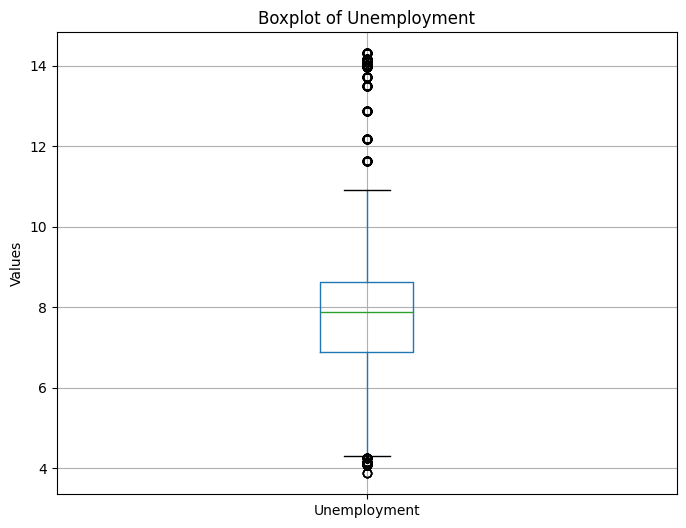

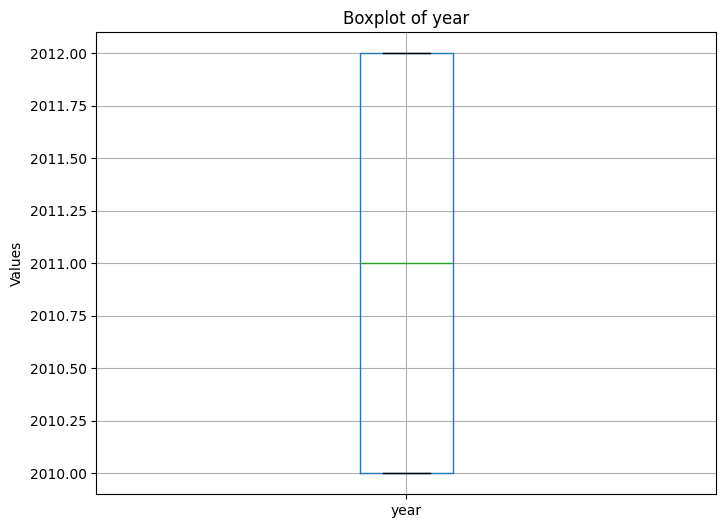

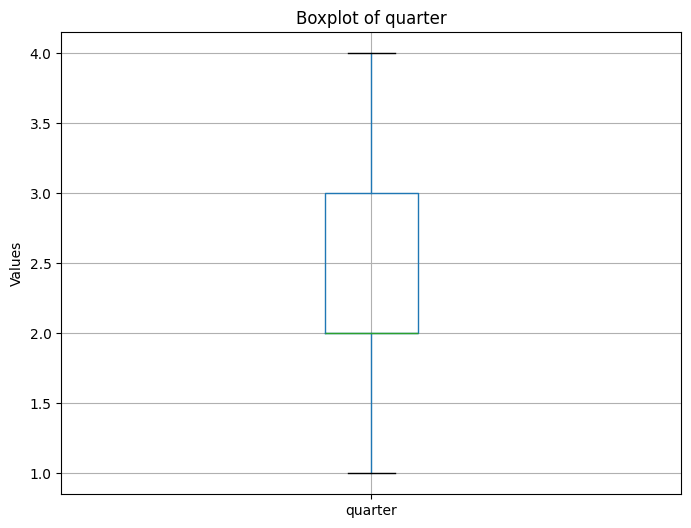

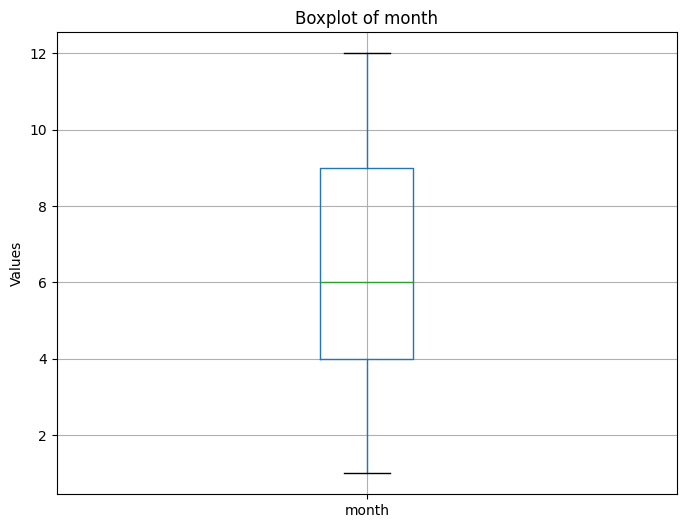

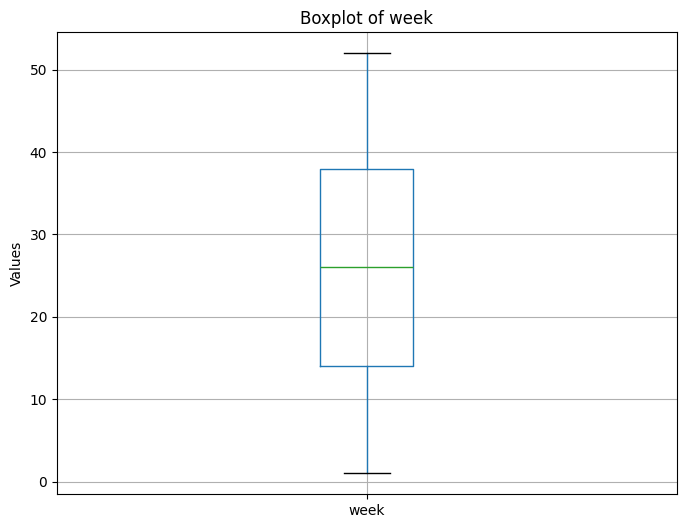

In [55]:
numeric_columns = df.select_dtypes(include=np.number).columns
if len(numeric_columns) == 0:
    print("No numeric columns found in the DataFrame.")
else:
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        df.boxplot(column=column)  
        plt.title(f'Boxplot of {column}')
        plt.ylabel('Values')
        plt.show()


In [155]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'year', 'quarter', 'season', 'month',
       'month_name', 'week', 'day_of_week'],
      dtype='object')

### Outlier columns
Temprature,unemployment

In [180]:
df["week"].max()

52

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   year          6435 non-null   int32         
 9   quarter       6435 non-null   int32         
 10  season        6435 non-null   object        
 11  month         6435 non-null   int32         
 12  month_name    6435 non-null   object        
 13  week          6435 non-null   UInt32        
 14  day_of_week   6435 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), float

In [112]:
df.drop(columns=["Date"],inplace=True)

### Pipeline

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,RobustScaler,FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [131]:
from sklearn import set_config
set_config(display="diagram")

In [160]:
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
preprocessor = ColumnTransformer(
    transformers=[
        ('standard_scaler', StandardScaler(), ['Fuel_Price', 'CPI', 'year']),
        ('robust_scaler', RobustScaler(), ['Temperature', 'Unemployment']),
        ('onehot', OneHotEncoder(), ['season', 'month_name', 'day_of_week'])
    ],
    remainder='passthrough'
)

In [162]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard_scaler', StandardScaler(),
                                 ['Fuel_Price', 'CPI', 'year']),
                                ('robust_scaler', RobustScaler(),
                                 ['Temperature', 'Unemployment']),
                                ('onehot', OneHotEncoder(),
                                 ['season', 'month_name', 'day_of_week'])])

In [163]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe', RFE(estimator=RandomForestRegressor(),n_features_to_select=5)), 
    ('regressor', RandomForestRegressor())
])

In [136]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fuel_Price', 'CPI',
                                                   'year']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['Temperature',
                                                   'Unemployment']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['season', 'month_name',
                                                   'day_of_week'])])),
                ('rfe',
                 RFE(estimator=RandomForestRegressor(),
                     n_features_to_select=5)),
                ('regressor', RandomForestRegressor())])

In [171]:
X_train.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'year', 'quarter', 'season', 'month', 'month_name',
       'week', 'day_of_week'],
      dtype='object')

In [164]:
param_dist = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [165]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,cv=5, scoring='r2',n_jobs=-1)
random_search.fit(X_train, np.log(y_train))

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['Fuel_Price',
                                                                                'CPI',
                                                                                'year']),
                                                                              ('robust_scaler',
                                                                               RobustScaler(),
                                                                               ['Temperature',
                                                                                'Unemployment']),
                                                                              ('onehot',
                                                                               OneHotEncoder(),
                                                                               ['season',
                                                                                'month_name',
                                                                                'day_of_week'])])),
                                             ('rfe',
                                              RFE(estimator=RandomForestRegressor(),
                                                  n_features_to_select=5)),
                                             ('regressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'regressor__max_depth': [None, 10, 20],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': [50, 100,
                                                                    200]},
                   scoring='r2')

In [166]:
best_model = random_search.best_estimator_
y_pred1 = best_model.predict(X_test)

In [152]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [167]:
mse = mean_squared_error(np.log(y_test), y_pred1)
mae = mean_absolute_error(np.log(y_test), y_pred1)
r2 = r2_score(np.log(y_test), y_pred1)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)
print('Predictions:', y_pred1[:5])
print('True Values:', np.log(y_test[:5]).values)

Mean Squared Error: 0.007221424328136198
Mean Absolute Error: 0.05595397204695274
R^2 Score: 0.9797793677165074
Predictions: [13.93567421 14.16045938 14.41969753 13.77708809 13.01599933]
True Values: [13.94548592 14.08159916 14.38609243 13.89028414 12.96886713]


In [168]:
preprocessor = best_model.named_steps['preprocessor']
transformed_feature_names = preprocessor.get_feature_names_out()
transformed_feature_names

array(['standard_scaler__Fuel_Price', 'standard_scaler__CPI',
       'standard_scaler__year', 'robust_scaler__Temperature',
       'robust_scaler__Unemployment', 'onehot__season_Autumn',
       'onehot__season_Spring', 'onehot__season_Summer',
       'onehot__season_Winter', 'onehot__month_name_April',
       'onehot__month_name_August', 'onehot__month_name_December',
       'onehot__month_name_February', 'onehot__month_name_January',
       'onehot__month_name_July', 'onehot__month_name_June',
       'onehot__month_name_March', 'onehot__month_name_May',
       'onehot__month_name_November', 'onehot__month_name_October',
       'onehot__month_name_September', 'onehot__day_of_week_Friday',
       'remainder__Store', 'remainder__Holiday_Flag',
       'remainder__quarter', 'remainder__month', 'remainder__week'],
      dtype=object)

In [169]:
rfe = best_model.named_steps['rfe']
selected_features = np.array(transformed_feature_names)[rfe.support_].tolist()

print("Selected features:", selected_features)

Selected features: ['standard_scaler__CPI', 'robust_scaler__Temperature', 'robust_scaler__Unemployment', 'remainder__Store', 'remainder__week']


In [170]:
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)